<a href="https://colab.research.google.com/github/Jorgecuenca1/Tps_ProcesamientoLenguajeNatural/blob/main/clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install nltk
!pip install tensorflow
!pip install keras
!pip install beautifulsoup4
!pip install requests
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=3efec5217ba3033dcdc14674fc23cc87c126030ab874af8c47c91eacfb7b0e3f
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [11]:
import random
import io
import pickle

import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

nltk.download('punkt')
nltk.download('stopwords')

url = "https://es.wikipedia.org/wiki/Historia_de_la_Wikipedia"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra todo el texto en la página
text = soup.get_text()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
print(text)





Historia de la Wikipedia - Wikipedia, la enciclopedia libre





























Ir al contenido







Menú principal





Menú principal
mover a la barra lateral
ocultar



		Navegación
	


PortadaPortal de la comunidadActualidadCambios recientesPáginas nuevasPágina aleatoriaAyudaDonacionesNotificar un error



















Buscar











Buscar






















Apariencia
















Crear una cuenta

Acceder








Herramientas personales





 Crear una cuenta Acceder





		Páginas para editores desconectados más información



ContribucionesDiscusión



























Historia de la Wikipedia



Añadir idiomas



						Contenido de la página no disponible en otros idiomas.
					










ArtículoDiscusión





español

















Crear







Herramientas





Herramientas
mover a la barra lateral
ocultar



		Acciones
	


Crear





		General
	


Lo que enlaza aquíSubir archivoPáginas especialesVersión para imprimirInformación de la pá

### 1 - Ejemplo de Preprocesamiento
- Hay que transformar las oraciones en tokens.
- Dichas oraciones hay que ajustarlas al tamaño fijo de nuestra sentencia de entrada al modelo.
- Hay que separar las palabras objetivos (target) que el modelo debe predecir en cada sentencia armada.

In [14]:
from keras.preprocessing.text import Tokenizer # equivalente a ltokenizer de nltk
from keras.preprocessing.text import text_to_word_sequence # equivalente a word_tokenize de nltk
from keras.utils import pad_sequences # se utilizará para padding

# largo de la secuencia, incluye seq input + word output
train_len = 4

In [15]:
tokens = text_to_word_sequence(text) # entran oraciones -> salen vectores de N posiciones (tokens)
tokens

['historia',
 'de',
 'la',
 'wikipedia',
 'wikipedia',
 'la',
 'enciclopedia',
 'libre',
 'ir',
 'al',
 'contenido',
 'menú',
 'principal',
 'menú',
 'principal',
 'mover',
 'a',
 'la',
 'barra',
 'lateral',
 'ocultar',
 'navegación',
 'portadaportal',
 'de',
 'la',
 'comunidadactualidadcambios',
 'recientespáginas',
 'nuevaspágina',
 'aleatoriaayudadonacionesnotificar',
 'un',
 'error',
 'buscar',
 'buscar',
 'apariencia',
 'crear',
 'una',
 'cuenta',
 'acceder',
 'herramientas',
 'personales',
 'crear',
 'una',
 'cuenta',
 'acceder',
 'páginas',
 'para',
 'editores',
 'desconectados',
 'más',
 'información',
 'contribucionesdiscusión',
 'historia',
 'de',
 'la',
 'wikipedia',
 'añadir',
 'idiomas',
 'contenido',
 'de',
 'la',
 'página',
 'no',
 'disponible',
 'en',
 'otros',
 'idiomas',
 'artículodiscusión',
 'español',
 'crear',
 'herramientas',
 'herramientas',
 'mover',
 'a',
 'la',
 'barra',
 'lateral',
 'ocultar',
 'acciones',
 'crear',
 'general',
 'lo',
 'que',
 'enlaza',
 'aq

1.1 - Transformar las oraciones en secuencias (tokens) de palabras

In [29]:
# Preprocesamiento del texto
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Elimina espacios adicionales
    text = re.sub(r'[^\w\s]', '', text)  # Elimina puntuaciones
    text = text.lower()  # Convierte a minúsculas
    return text

processed_text = preprocess_text(text)

# Guardar el texto en un DataFrame de pandas
data = {'text': [processed_text]}
df = pd.DataFrame(data)

In [30]:
# Recorrer todas las filas y transformar las oraciones
# en secuencias de palabras
sentence_tokens = []
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [31]:
# Demos un vistazo
sentence_tokens[:2]

[['historia',
  'de',
  'la',
  'wikipedia',
  'wikipedia',
  'la',
  'enciclopedia',
  'libre',
  'ir',
  'al',
  'contenido',
  'menú',
  'principal',
  'menú',
  'principal',
  'mover',
  'a',
  'la',
  'barra',
  'lateral',
  'ocultar',
  'navegación',
  'portadaportal',
  'de',
  'la',
  'comunidadactualidadcambios',
  'recientespáginas',
  'nuevaspágina',
  'aleatoriaayudadonacionesnotificar',
  'un',
  'error',
  'buscar',
  'buscar',
  'apariencia',
  'crear',
  'una',
  'cuenta',
  'acceder',
  'herramientas',
  'personales',
  'crear',
  'una',
  'cuenta',
  'acceder',
  'páginas',
  'para',
  'editores',
  'desconectados',
  'más',
  'información',
  'contribucionesdiscusión',
  'historia',
  'de',
  'la',
  'wikipedia',
  'añadir',
  'idiomas',
  'contenido',
  'de',
  'la',
  'página',
  'no',
  'disponible',
  'en',
  'otros',
  'idiomas',
  'artículodiscusión',
  'español',
  'crear',
  'herramientas',
  'herramientas',
  'mover',
  'a',
  'la',
  'barra',
  'lateral',
 

In [32]:
# Código para hacer el desfasaje de las palabras
# según el train_len
text_sequences = []

for i in range(train_len, len(tokens)):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [33]:
# Demos un vistazo a nuestros vectores para entrenar el modelo
text_sequences

[['historia', 'de', 'la', 'wikipedia'],
 ['de', 'la', 'wikipedia', 'wikipedia'],
 ['la', 'wikipedia', 'wikipedia', 'la'],
 ['wikipedia', 'wikipedia', 'la', 'enciclopedia'],
 ['wikipedia', 'la', 'enciclopedia', 'libre'],
 ['la', 'enciclopedia', 'libre', 'ir'],
 ['enciclopedia', 'libre', 'ir', 'al'],
 ['libre', 'ir', 'al', 'contenido'],
 ['ir', 'al', 'contenido', 'menú'],
 ['al', 'contenido', 'menú', 'principal'],
 ['contenido', 'menú', 'principal', 'menú'],
 ['menú', 'principal', 'menú', 'principal'],
 ['principal', 'menú', 'principal', 'mover'],
 ['menú', 'principal', 'mover', 'a'],
 ['principal', 'mover', 'a', 'la'],
 ['mover', 'a', 'la', 'barra'],
 ['a', 'la', 'barra', 'lateral'],
 ['la', 'barra', 'lateral', 'ocultar'],
 ['barra', 'lateral', 'ocultar', 'navegación'],
 ['lateral', 'ocultar', 'navegación', 'portadaportal'],
 ['ocultar', 'navegación', 'portadaportal', 'de'],
 ['navegación', 'portadaportal', 'de', 'la'],
 ['portadaportal', 'de', 'la', 'comunidadactualidadcambios'],
 ['de

1.2 - Crear los vectores de palabras (word2vec)

Ahora necesitamos pasarlos a números para que lo entienda la red y separar input de output.
- El Input seran integers (word2vec)
- Mientras que el output será one hot encodeado (labels) del tamaño del vocabulario

In [34]:
tok = Tokenizer()

# El tokenizer "aprende" las palabras que se usaran
# Se construye (fit) una vez por proyecto, se aplica N veces (tal cual un encoder)
# El token 0 es reservado y no es asignado, esta sutileza nos dará un pequeño
# problema al momento de hacer la codificación OHE, pero es sencillo de resolver
tok.fit_on_texts(text_sequences)

# Convertimos las palabras a números
# entran palabras -> salen números
sequences = tok.texts_to_sequences(text_sequences)

In [35]:
# Ahora sequences tiene los números "ID", largo 4
sequences

[[17, 1, 2, 3],
 [1, 2, 3, 3],
 [2, 3, 3, 2],
 [3, 3, 2, 33],
 [3, 2, 33, 34],
 [2, 33, 34, 58],
 [33, 34, 58, 59],
 [34, 58, 59, 18],
 [58, 59, 18, 35],
 [59, 18, 35, 36],
 [18, 35, 36, 35],
 [35, 36, 35, 36],
 [36, 35, 36, 19],
 [35, 36, 19, 7],
 [36, 19, 7, 2],
 [19, 7, 2, 20],
 [7, 2, 20, 21],
 [2, 20, 21, 22],
 [20, 21, 22, 60],
 [21, 22, 60, 61],
 [22, 60, 61, 1],
 [60, 61, 1, 2],
 [61, 1, 2, 62],
 [1, 2, 62, 63],
 [2, 62, 63, 64],
 [62, 63, 64, 65],
 [63, 64, 65, 66],
 [64, 65, 66, 67],
 [65, 66, 67, 37],
 [66, 67, 37, 37],
 [67, 37, 37, 38],
 [37, 37, 38, 10],
 [37, 38, 10, 23],
 [38, 10, 23, 24],
 [10, 23, 24, 39],
 [23, 24, 39, 25],
 [24, 39, 25, 68],
 [39, 25, 68, 10],
 [25, 68, 10, 23],
 [68, 10, 23, 24],
 [10, 23, 24, 39],
 [23, 24, 39, 26],
 [24, 39, 26, 32],
 [39, 26, 32, 69],
 [26, 32, 69, 70],
 [32, 69, 70, 71],
 [69, 70, 71, 27],
 [70, 71, 27, 72],
 [71, 27, 72, 17],
 [27, 72, 17, 1],
 [72, 17, 1, 2],
 [17, 1, 2, 3],
 [1, 2, 3, 73],
 [2, 3, 73, 40],
 [3, 73, 40, 18],


In [36]:
# Cantidad de casos (doc) de entrada
print(tok.document_count)

380


In [37]:
# Cantidad de veces que aparece cada palabra
print(len(tok.word_counts))

207


In [38]:
# El índice para cada palabra
# El sistema las ordena de las más populares a las menos populares
print(tok.word_index)

{'de': 1, 'la': 2, 'wikipedia': 3, 'que': 4, 'no': 5, 'el': 6, 'a': 7, 'en': 8, 'wikipedia»': 9, 'crear': 10, 'página': 11, 'otros': 12, '«historia': 13, 'y': 14, 'si': 15, 'artículo': 16, 'historia': 17, 'contenido': 18, 'mover': 19, 'barra': 20, 'lateral': 21, 'ocultar': 22, 'una': 23, 'cuenta': 24, 'herramientas': 25, 'páginas': 26, 'información': 27, 'busca': 28, 'es': 29, 'artículos': 30, 'con': 31, 'para': 32, 'enciclopedia': 33, 'libre': 34, 'menú': 35, 'principal': 36, 'buscar': 37, 'apariencia': 38, 'acceder': 39, 'idiomas': 40, 'lo': 41, 'código': 42, 'proyectos': 43, 'commons': 44, 'nombre': 45, 'donde': 46, 'buscas': 47, 'otras': 48, 'ya': 49, 'este': 50, 'también': 51, 'textos': 52, 'o': 53, 'serán': 54, 'borrados': 55, '—véase': 56, '«wikipedia': 57, 'ir': 58, 'al': 59, 'navegación': 60, 'portadaportal': 61, 'comunidadactualidadcambios': 62, 'recientespáginas': 63, 'nuevaspágina': 64, 'aleatoriaayudadonacionesnotificar': 65, 'un': 66, 'error': 67, 'personales': 68, 'edito

In [39]:
# Cantidad de veces quea aparece cada palabra en cada "documento"
# (1 documento = 1 caso de entrada)
print(tok.word_docs)

defaultdict(<class 'int'>, {'la': 90, 'wikipedia': 53, 'de': 114, 'historia': 13, 'enciclopedia': 8, 'libre': 8, 'ir': 4, 'al': 4, 'contenido': 12, 'menú': 6, 'principal': 6, 'mover': 12, 'a': 20, 'barra': 12, 'lateral': 12, 'ocultar': 12, 'navegación': 4, 'portadaportal': 4, 'comunidadactualidadcambios': 4, 'recientespáginas': 4, 'nuevaspágina': 4, 'aleatoriaayudadonacionesnotificar': 4, 'un': 4, 'error': 4, 'buscar': 5, 'apariencia': 8, 'crear': 16, 'una': 12, 'cuenta': 12, 'acceder': 8, 'herramientas': 9, 'personales': 4, 'páginas': 12, 'para': 9, 'editores': 4, 'desconectados': 4, 'más': 4, 'información': 12, 'contribucionesdiscusión': 4, 'añadir': 4, 'idiomas': 8, 'página': 16, 'no': 24, 'disponible': 4, 'en': 20, 'otros': 16, 'artículodiscusión': 4, 'español': 4, 'acciones': 4, 'general': 4, 'lo': 8, 'que': 47, 'enlaza': 4, 'aquísubir': 4, 'archivopáginas': 4, 'especialesversión': 4, 'imprimirinformación': 4, 'páginaobtener': 4, 'url': 4, 'acortadodescargar': 4, 'código': 8, 'qr'

### 2 - Preprocesamiento completo
Debemos realizar los mismos pasos que en el ejemplo anterior, pero antes de eso debemos transformar ese dataset de filas de oraciones en un texto completo continuo para poder extraer el vocabulario.

In [41]:
# Vistazo a las primeras filas
df.loc[:15,0]

KeyError: 0

In [43]:
# Concatenamos todos los rows en un solo valor
corpus = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=0)[0]
corpus

' historia de la wikipedia  wikipedia la enciclopedia libre ir al contenido menú principal menú principal mover a la barra lateral ocultar navegación portadaportal de la comunidadactualidadcambios recientespáginas nuevaspágina aleatoriaayudadonacionesnotificar un error buscar buscar apariencia crear una cuenta acceder herramientas personales crear una cuenta acceder páginas para editores desconectados más información contribucionesdiscusión historia de la wikipedia añadir idiomas contenido de la página no disponible en otros idiomas artículodiscusión español crear herramientas herramientas mover a la barra lateral ocultar acciones crear general lo que enlaza aquísubir archivopáginas especialesversión para imprimirinformación de la páginaobtener url acortadodescargar código qr apariencia mover a la barra lateral ocultar de wikipedia la enciclopedia libre wikipedia todavía no tiene una página llamada historia de la wikipedia busca historia de la wikipedia en otros proyectos hermanos de w

In [44]:
# Transformar el corpus a tokens
tokens=text_to_word_sequence(corpus)
# Vistazo general de los primeros tokens
tokens[:20]

['historia',
 'de',
 'la',
 'wikipedia',
 'wikipedia',
 'la',
 'enciclopedia',
 'libre',
 'ir',
 'al',
 'contenido',
 'menú',
 'principal',
 'menú',
 'principal',
 'mover',
 'a',
 'la',
 'barra',
 'lateral']

In [45]:
print("Cantidad de tokens en el corpus:", len(tokens))

Cantidad de tokens en el corpus: 375


In [46]:
# Código para hacer el desfasaje de las palabras
# según el train_len
text_sequences = []
for i in range(train_len, len(tokens)):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [47]:
# Demos un vistazo a nuestros vectores para entrenar el modelo
text_sequences[:20]

[['historia', 'de', 'la', 'wikipedia'],
 ['de', 'la', 'wikipedia', 'wikipedia'],
 ['la', 'wikipedia', 'wikipedia', 'la'],
 ['wikipedia', 'wikipedia', 'la', 'enciclopedia'],
 ['wikipedia', 'la', 'enciclopedia', 'libre'],
 ['la', 'enciclopedia', 'libre', 'ir'],
 ['enciclopedia', 'libre', 'ir', 'al'],
 ['libre', 'ir', 'al', 'contenido'],
 ['ir', 'al', 'contenido', 'menú'],
 ['al', 'contenido', 'menú', 'principal'],
 ['contenido', 'menú', 'principal', 'menú'],
 ['menú', 'principal', 'menú', 'principal'],
 ['principal', 'menú', 'principal', 'mover'],
 ['menú', 'principal', 'mover', 'a'],
 ['principal', 'mover', 'a', 'la'],
 ['mover', 'a', 'la', 'barra'],
 ['a', 'la', 'barra', 'lateral'],
 ['la', 'barra', 'lateral', 'ocultar'],
 ['barra', 'lateral', 'ocultar', 'navegación'],
 ['lateral', 'ocultar', 'navegación', 'portadaportal']]

In [48]:
# Proceso de tokenización
tok = Tokenizer()
tok.fit_on_texts(text_sequences)

# Convertimos las palabras a números
# entran palabras -> salen números
sequences = tok.texts_to_sequences(text_sequences)

# Damos un vistazo
sequences[:20]

[[5, 1, 2, 3],
 [1, 2, 3, 3],
 [2, 3, 3, 2],
 [3, 3, 2, 32],
 [3, 2, 32, 33],
 [2, 32, 33, 54],
 [32, 33, 54, 55],
 [33, 54, 55, 16],
 [54, 55, 16, 34],
 [55, 16, 34, 35],
 [16, 34, 35, 34],
 [34, 35, 34, 35],
 [35, 34, 35, 17],
 [34, 35, 17, 8],
 [35, 17, 8, 2],
 [17, 8, 2, 18],
 [8, 2, 18, 19],
 [2, 18, 19, 20],
 [18, 19, 20, 56],
 [19, 20, 56, 57]]

In [49]:
print("Cantidad de rows del dataset:", len(sequences))

Cantidad de rows del dataset: 371


### 3 - Input y target

In [50]:
# Con numpy es muy fácil realizar el slicing de vectores
ex = np.array([[1,2,3,4],[5,6,7,8]])
ex

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [51]:
# Con numpy es muy fácil realizar el slicing de vectores
print("Dimension:", ex.shape)
print("Todos los elementos:", ex)
print("Todos los elementos menos el último:", ex[:, :-1])

Dimension: (2, 4)
Todos los elementos: [[1 2 3 4]
 [5 6 7 8]]
Todos los elementos menos el último: [[1 2 3]
 [5 6 7]]


In [52]:
input = ex[:,:-1] # todos los rows, menos la ultima col
target = ex[:, -1] # última col de cada row

print("Input:", input)
print("Target:", target)

Input: [[1 2 3]
 [5 6 7]]
Target: [4 8]


In [53]:
arr_sequences = np.array(sequences)
x_data = arr_sequences[:,:-1]
y_data_int = arr_sequences[:,-1] # aún falta el oneHotEncoder

print(x_data.shape)
print(y_data_int.shape)

(371, 3)
(371,)


In [54]:
# Palabras del vocabulario
tok.index_word

{1: 'de',
 2: 'la',
 3: 'wikipedia',
 4: 'que',
 5: 'historia',
 6: 'no',
 7: 'el',
 8: 'a',
 9: 'en',
 10: 'crear',
 11: 'página',
 12: 'otros',
 13: 'y',
 14: 'si',
 15: 'artículo',
 16: 'contenido',
 17: 'mover',
 18: 'barra',
 19: 'lateral',
 20: 'ocultar',
 21: 'una',
 22: 'cuenta',
 23: 'herramientas',
 24: 'páginas',
 25: 'información',
 26: 'busca',
 27: 'es',
 28: 'artículos',
 29: 'con',
 30: 'o',
 31: 'para',
 32: 'enciclopedia',
 33: 'libre',
 34: 'menú',
 35: 'principal',
 36: 'buscar',
 37: 'apariencia',
 38: 'acceder',
 39: 'idiomas',
 40: 'código',
 41: 'proyectos',
 42: 'commons',
 43: 'nombre',
 44: 'donde',
 45: 'buscas',
 46: 'otras',
 47: 'ya',
 48: 'este',
 49: 'también',
 50: 'textos',
 51: 'serán',
 52: 'borrados',
 53: 'véase',
 54: 'ir',
 55: 'al',
 56: 'navegación',
 57: 'portadaportal',
 58: 'comunidadactualidadcambios',
 59: 'recientespáginas',
 60: 'nuevaspágina',
 61: 'aleatoriaayudadonacionesnotificar',
 62: 'un',
 63: 'error',
 64: 'personales',
 65: 'e

In [55]:
# Cantidad de palabras en el vocabulario
vocab_size = len(tok.word_counts)
vocab_size

199

In [56]:
# Transformar los datos a oneHotEncoding
y_data = to_categorical(y_data_int, num_classes=1629)

In [57]:
# En el caso anterior explota porque y_data_int comienza en "1" en vez de "0"
# valor minimo:
min(y_data_int)

1

In [58]:
y_data_int_offset = y_data_int - 1
y_data = to_categorical(y_data_int_offset, num_classes=vocab_size)
y_data.shape

(371, 199)

### 4 - Entrenar el modelo

In [59]:
# largo de la secuencia de entrada
input_seq_len = x_data.shape[1]
input_seq_len

3

In [60]:
# Largo del vector de salida --> vocab_size
output_size = vocab_size
output_size

199

In [61]:
model = Sequential()

# Embedding:
# input_seq_len = 3 --> ingreso 3 palabras
# input_dim = vocab_size --> 1628 palabras distintas
# output_dim = 5 --> crear embeddings de tamaño 3 (tamaño variable y ajustable)
model.add(Embedding(input_dim=vocab_size+1, output_dim=5, input_length=input_seq_len))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64)) # La última capa LSTM no lleva return_sequences
model.add(Dense(32, activation='relu'))

# Predicción de clasificación con softmax
# La salida vuelve al espacio de 1628 palabras posibles
model.add(Dense(vocab_size, activation='softmax'))

# Clasificación multiple categórica --> loss = categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 5)              1000      
                                                                 
 lstm (LSTM)                 (None, 3, 64)             17920     
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 199)               6567      
                                                                 
Total params: 60591 (236.68 KB)
Trainable params: 60591 

In [62]:
hist = model.fit(x_data, y_data, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 8s 219ms/step - loss: 5.2919 - accuracy: 0.0574 - val_loss: 5.2917 - val_accuracy: 0.0133
Epoch 2/50
10/10 [==============================] - 1s 128ms/step - loss: 5.2826 - accuracy: 0.0709 - val_loss: 5.2910 - val_accuracy: 0.0133
Epoch 3/50
10/10 [==============================] - 0s 27ms/step - loss: 5.2687 - accuracy: 0.0709 - val_loss: 5.2886 - val_accuracy: 0.0133
Epoch 4/50
10/10 [==============================] - 0s 44ms/step - loss: 5.2332 - accuracy: 0.0709 - val_loss: 5.2882 - val_accuracy: 0.0133
Epoch 5/50
10/10 [==============================] - 0s 40ms/step - loss: 5.1348 - accuracy: 0.0709 - val_loss: 5.3180 - val_accuracy: 0.0133
Epoch 6/50
10/10 [==============================] - 1s 56ms/step - loss: 4.9087 - accuracy: 0.0709 - val_loss: 5.6952 - val_accuracy: 0.0133
Epoch 7/50
10/10 [==============================] - 2s 165ms/step - loss: 4.8149 - accuracy: 0.0709 - val_loss: 5.7291 - val_accuracy: 0.0133
Epoch 8/50

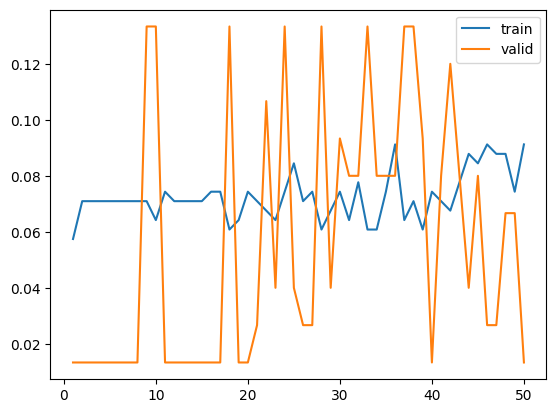

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_accuracy'], label='valid')
plt.show()

### 5 - Predicción de próxima palabra

In [64]:
# Keras pad_sequences
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# Si la secuencia de entrada supera al input_seq_len (3) se trunca
# Si la secuencia es más corta se agregna ceros al comienzo

In [65]:
# Se utilizará gradio para ensayar el modelo
# Herramienta poderosa para crear interfaces rápidas para ensayar modelos
# https://gradio.app/
import sys
!{sys.executable} -m pip install gradio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.5 M

In [67]:
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences

def model_response(human_text):
    # Encodeamos
    encoded = tok.texts_to_sequences([human_text])[0]
    # Si tienen distinto largo
    encoded = pad_sequences([encoded], maxlen=3, padding='pre')

    # Predicción softmax
    y_hat = model.predict(encoded).argmax(axis=-1)

    # Debemos buscar en el vocabulario la palabra
    # que corresopnde al indice (y_hat) predicho por el modelo
    out_word = ''
    for word, index in tok.word_index.items():
        if index == y_hat:
            out_word = word
            break

    # Agrego la palabra a la frase predicha
    return human_text + ' ' + out_word

iface = gr.Interface(
    fn=model_response,
    inputs="text",
    outputs="text"
)

iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d929d3b8809784add9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 20ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d929d3b8809784add9.gradio.live


### 6 - Generación de secuencias nuevas

In [68]:
def generate_seq(model, tokenizer, seed_text, max_length, n_words):
    """
        Exec model sequence prediction

        Args:
            model (keras): modelo entrenado
            tokenizer (keras tokenizer): tonenizer utilizado en el preprocesamiento
            seed_text (string): texto de entrada (input_seq)
            max_length (int): máxima longitud de la sequencia de entrada
            n_words (int): números de palabras a agregar a la sequencia de entrada
        returns:
            output_text (string): sentencia con las "n_words" agregadas
    """
    output_text = seed_text
	# generate a fixed number of words
    for _ in range(n_words):
		# Encodeamos
        encoded = tokenizer.texts_to_sequences([output_text])[0]
		# Si tienen distinto largo
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')

		# Predicción softmax
        y_hat = model.predict(encoded).argmax(axis=-1)
		# Vamos concatenando las predicciones
        out_word = ''

        # Debemos buscar en el vocabulario la palabra
        # que corresopnde al indice (y_hat) predicho por le modelo
        for word, index in tokenizer.word_index.items():
            if index == y_hat:
                out_word = word
                break

		# Agrego las palabras a la frase predicha
        output_text += ' ' + out_word
    return output_text

In [69]:
input_text=' Project Gutenberg Etexts are made available in what has become known as “Plain Vanilla ASCII,” meaning the low set of the American Standard Code for Information Interchange: i.e., the same kind of character you read on\'t'

generate_seq(model, tok, input_text, max_length=3, n_words=2)

1/1 [==============================] - 0s 18ms/step


" Project Gutenberg Etexts are made available in what has become known as “Plain Vanilla ASCII,” meaning the low set of the American Standard Code for Information Interchange: i.e., the same kind of character you read on't nombre wikipedia"